<a href="https://colab.research.google.com/github/tarunkay7/AIML-IIITH/blob/main/AIML_Module_4_Lab_3_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4: Perceptron and Gradient Descent
## Lab 3: Gradient Descent

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is

*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$

In this lab, we will discuss stochastic gradient descent, mini-batch gradient descent and batch gradient descent.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)

# Creating the Data

Let's generate some data with:
\begin{equation} y_0= 4 \end{equation}
\begin{equation} y_1= 3 \end{equation}

and also add some noise to the data.

In [4]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Let's also plot the data we just created

Text(0, 0.5, 'y')

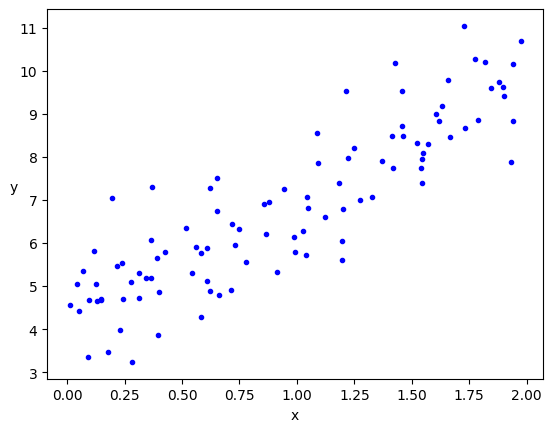

In [5]:
plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.ylabel('y', rotation=0)

## Cost Function

The equation for calculating cost function is as shown below. The cost function is only for linear regression. For other algorithms, the cost function will be different and the gradients would have to be derived from the cost functions

\begin{equation}
J(y_{pred}) = \frac{1}{2} m \sum_{i=1}^{m} (h(y_{pred})^{(i)} - y^{(i)})^2
\end{equation}

In [6]:
def cal_cost(y_pred, X, y):
    '''
    Calculates the cost for given X and Y.
    y_pred = Vector of y_preds
    X = Row of X's np.zeros((2, j))
    y = Actual y's np.zeros((2, 1))

    where:
        j is the no of features
    '''

    m = len(y)

    predictions = X.dot(y_pred)
    cost = (1 / 2 * m) * np.sum(np.square(predictions - y))

    return cost

## Gradients

\begin{equation}
y_{pred_0}: = y_{pred_0} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
y_{pred_1}: = y_{pred_1} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
.

.

.

.

\begin{equation}
y_{pred_j}: = y_{pred_j} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

In [7]:
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 2))

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it,:] = y_pred.T
        cost_history[it]  = cal_cost(y_pred, X, y)

    return y_pred, cost_history, y_pred_history

Let's do 1000 iterations with a learning rate of 0.01.
We will start with a random prediction.

In [8]:
lr = 0.01
n_iter = 1000

y_pred = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 3.903
y_pred[1]: 3.046
Final error: 4180.375


Plotting the error vs Number of iterations

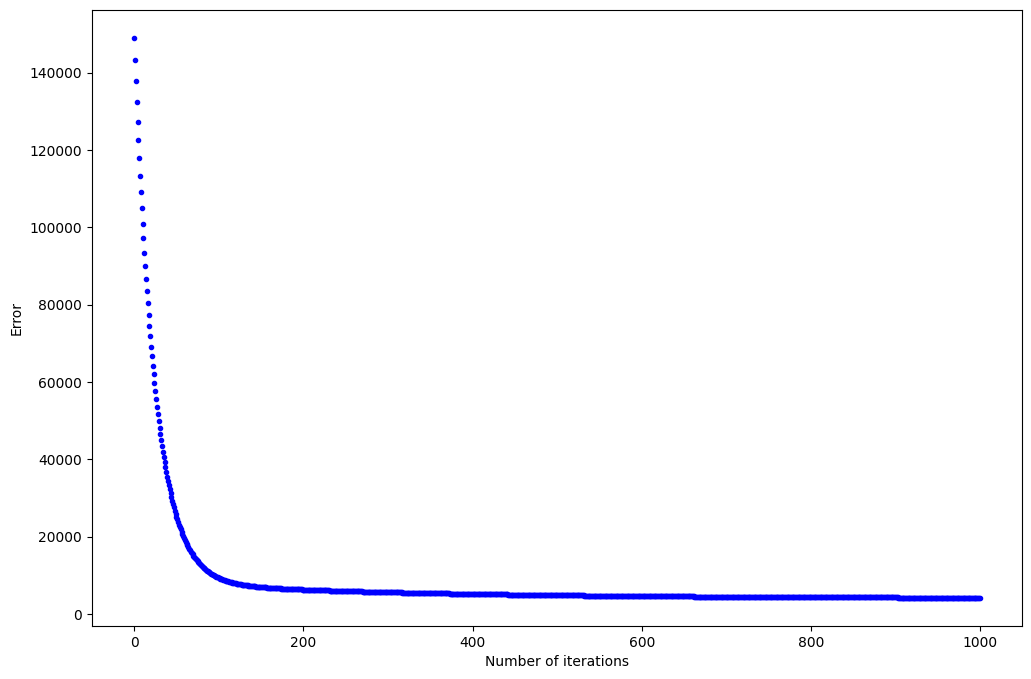

In [9]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history, 'b.')

Zooming in...

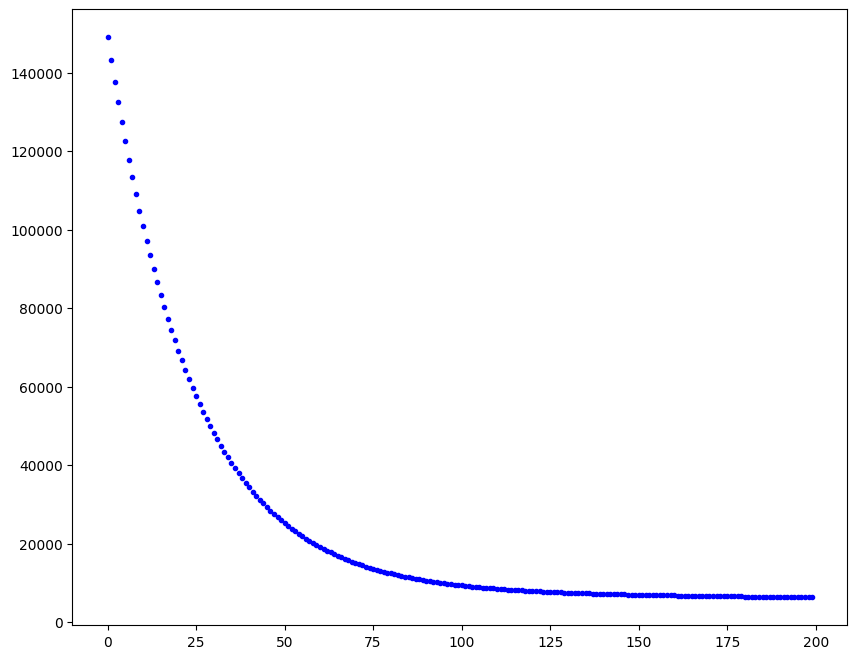

In [10]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(200), cost_history[:200], 'b.')

# Stochastic Gradient Descent

In Batch Gradient Descent we were considering all the examples for every step of Gradient Descent. But what if our dataset is very huge. Deep learning models crave for data. The more the data the more chances of a model to be good. Suppose our dataset has 5 million examples, then just to take one step the model will have to calculate the gradients of all the 5 million examples. This does not seem an efficient way. To tackle this problem we have Stochastic Gradient Descent. In Stochastic Gradient Descent (SGD), we consider just one example at a time to take a single step.

In [11]:
def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_pred np.random.randn(j,1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [12]:
lr = 0.5
n_iter = 50
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.121
y_pred[1]: 2.755
Final error: 41.313


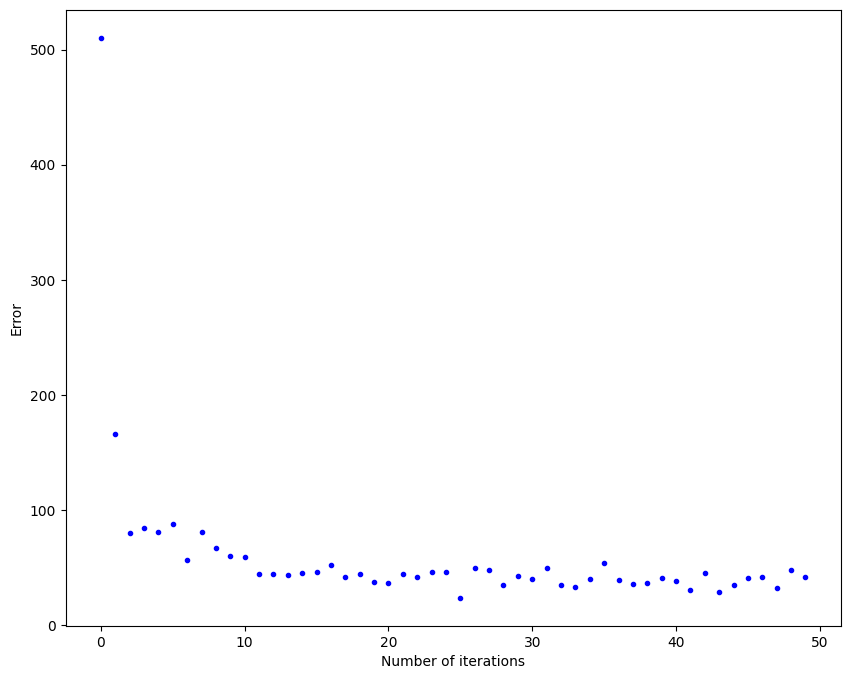

In [13]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

# Mini Batch Gradient Descent

We have seen the Batch Gradient Descent. We have also seen the Stochastic Gradient Descent. Batch Gradient Descent can be used for smoother curves. SGD can be used when the dataset is large. Batch Gradient Descent converges directly to minima. SGD converges faster for larger datasets. But, since in SGD we use only one example at a time, we cannot implement the vectorized implementation on it. This can slow down the computations. To tackle this problem, a mixture of Batch Gradient Descent and SGD is used.
Neither we use all the dataset all at once nor we use the single example at a time. We use a batch of a fixed number of training examples which is less than the actual dataset and call it a mini-batch. Doing this helps us achieve the advantages of both the former variants we saw.

In [14]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [15]:
lr = 0.1
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.148
y_pred[1]: 2.827
Final error: 807.488


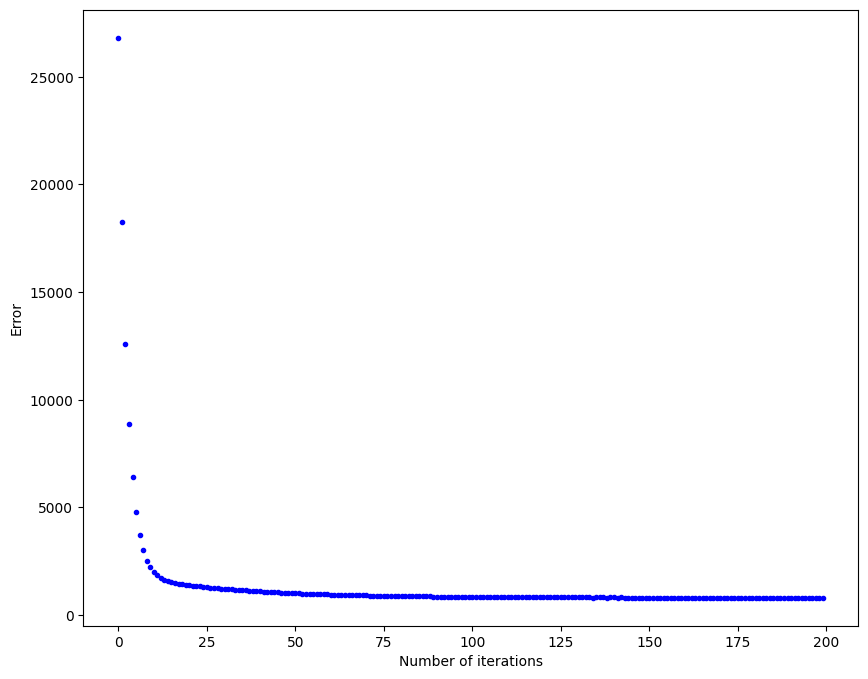

In [16]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

Things to try out:

1. Change batch size in mini-batch gradient descent.
2. Test all the three out on real datasets.
3. Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD.

In [17]:
#1. Trying with batch size 50

def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=50):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [18]:
lr = 0.1
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.248
y_pred[1]: 2.741
Final error: 2010.278


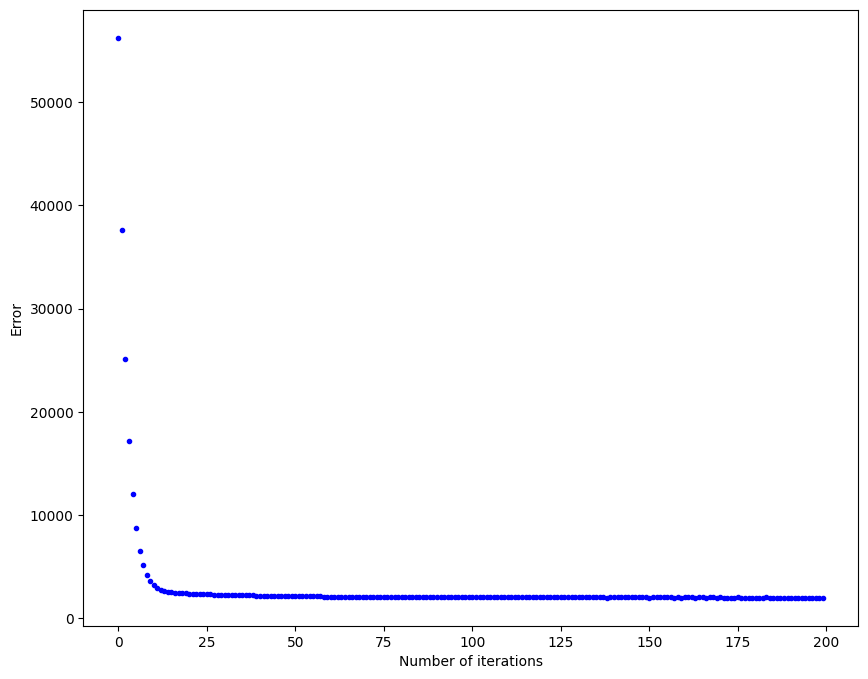

In [19]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

In [20]:
#2.
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def compute_loss(X, y, weights):
    logits = X.dot(weights)
    predictions = sigmoid(logits)
    loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return loss

def compute_gradient(X, y, weights):
    logits = X.dot(weights)
    predictions = sigmoid(logits)
    gradient = X.T.dot(predictions - y) / len(y)
    return gradient

def minibatch_gradient_descent(X, y, learning_rate=0.01, batch_size=32, epochs=50):
    # Add bias term to features
    X_bias = np.c_[np.ones((X.shape[0], 1)), X]

    # Initialize weights
    weights = np.random.rand(X_bias.shape[1])

    for epoch in range(epochs):
        for i in range(0, len(X), batch_size):
            X_batch = X_bias[i:i + batch_size]
            y_batch = y[i:i + batch_size]

            gradient = compute_gradient(X_batch, y_batch, weights)
            weights -= learning_rate * gradient

        loss = compute_loss(X_bias, y, weights)
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss}")

    return weights

# Load Iris dataset
iris = datasets.load_iris()
X, y = iris.data, (iris.target == 2).astype(int)  # Binary classification (Iris-Virginica or not)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply minibatch gradient descent
weights = minibatch_gradient_descent(X_train, y_train)

# Make predictions on the test set
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]
logits = X_test_bias.dot(weights)
predictions = (sigmoid(logits) > 0.5).astype(int)

# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")


Epoch 1/50, Loss: 0.5123912627201614
Epoch 2/50, Loss: 0.5082313250337922
Epoch 3/50, Loss: 0.5041992623445729
Epoch 4/50, Loss: 0.5002899046143809
Epoch 5/50, Loss: 0.49649830608021356
Epoch 6/50, Loss: 0.49281973608871105
Epoch 7/50, Loss: 0.4892496701840426
Epoch 8/50, Loss: 0.4857837814590412
Epoch 9/50, Loss: 0.4824179321766277
Epoch 10/50, Loss: 0.47914816566607626
Epoch 11/50, Loss: 0.4759706984965082
Epoch 12/50, Loss: 0.4728819129281401
Epoch 13/50, Loss: 0.4698783496402086
Epoch 14/50, Loss: 0.4669567007331357
Epoch 15/50, Loss: 0.4641138030013478
Epoch 16/50, Loss: 0.4613466314722075
Epoch 17/50, Loss: 0.45865229320571826
Epoch 18/50, Loss: 0.45602802134902903
Epoch 19/50, Loss: 0.453471169439243
Epoch 20/50, Loss: 0.4509792059476416
Epoch 21/50, Loss: 0.44854970905813213
Epoch 22/50, Loss: 0.4461803616725161
Epoch 23/50, Loss: 0.44386894663503246
Epoch 24/50, Loss: 0.44161334216855863
Epoch 25/50, Loss: 0.4394115175148322
Epoch 26/50, Loss: 0.43726152877107893
Epoch 27/50, 

In [23]:
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Boston Housing dataset from seaborn
boston = sns.load_dataset('tips')  # Substitute with the desired dataset

# Assuming 'total_bill' as the feature and 'tip' as the target for illustration
X = boston[['total_bill']].values
y = boston['tip'].values.reshape(-1, 1)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add a bias term to the features
X_bias = np.c_[np.ones((X.shape[0], 1)), X]

# Initialize weights randomly
np.random.seed(42)  # for reproducibility
y_pred_initial = np.random.randn(X_bias.shape[1], 1)

# Use gradient descent
final_y_pred, cost_history, y_pred_history = gradient_descent(X_bias, y, y_pred_initial, learning_rate=0.01, iterations=100)

# Print the final weights
print("Final Weights:")
print(final_y_pred)

# Optionally, you can print or plot the cost history to visualize the convergence
print("\nCost History:")
print(cost_history)

# Optionally, you can print or plot the history of y_pred during training
print("\nHistory of y_pred during training:")
print(y_pred_history)

Final Weights:
[[2.08262516]
 [0.54091662]]

Cost History:
[246901.63487206 242602.01285042 238387.95330702 234257.75354853
 230209.74476524 226242.29135673 222353.79027105 218542.67035698
 214807.3917292  211146.44514611 207558.35140002 204041.66071948
 200594.95218348 197216.83314735 193905.93868004 190660.93101263
 187480.4989978  184363.35758006 181308.24727654 178313.93366806
 175379.20690039 172502.88119539 169683.79437192 166920.80737624
 164212.80382178 161558.68953804 158957.39212856 156407.86053752
 153909.06462514 151459.99475142 149059.66136819 146707.09461929
 144401.34394868 142141.47771643 139926.58282219 137755.76433635
 135628.14513838 133542.86556244 131499.08305007 129495.9718097
 127532.722483   125608.54181791 123722.65234806 121874.29207865
 120062.71417861 118287.18667877 116546.99217619 114841.4275442
 113169.80364839 111531.44506811 109925.68982358 108351.88910841
 106809.40702747 105297.62033995 103815.9182075  102363.70194749
 100940.38479106  99545.39164604 

In [28]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Boston Housing dataset from seaborn
boston = sns.load_dataset('tips')  # Substitute with the desired dataset

# Assuming 'total_bill' as the feature and 'tip' as the target for illustration
X = boston[['total_bill']].values
y = boston['tip'].values.reshape(-1, 1)
# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add a bias term to the features
X_bias = np.c_[np.ones((X.shape[0], 1)), X]

# Initialize weights randomly
np.random.seed(42)  # for reproducibility
y_pred_initial = np.random.randn(X_bias.shape[1], 1)

# Use stochastic gradient descent
final_y_pred, cost_history = stocashtic_gradient_descent(X_bias, y, y_pred_initial, learning_rate=0.01, iterations=100)

# Print the final weights
print("Final Weights:")
print(final_y_pred)

# Optionally, you can print or plot the cost history to visualize the convergence
print("\nCost History:")
print(cost_history)


Final Weights:
[[2.07476119]
 [0.53093819]]

Cost History:
[1001.92982549  978.36160566 1004.1305748  1022.89943231  876.89315313
  948.21436877 1034.54532813  959.26003056  935.18299653  808.6008705
  828.10559475  994.83967999  726.20630295  717.88289731  764.2612248
  801.93930519  806.74168009  777.03703551  760.91226064  666.67936717
  708.62975102  818.83080926  677.42654869  666.84623728  550.3748777
  635.83316667  645.785567    662.0602358   629.77521737  672.6855184
  611.57483334  632.12198     661.58386418  605.3393177   671.04120693
  499.10332984  503.46817811  552.55406728  532.20477297  539.56162308
  527.76477988  546.09064244  425.38724905  461.50042664  483.53467406
  383.14841857  431.03823382  540.10438751  501.17413815  339.31028335
  452.95912574  412.04112629  422.13790783  384.98389352  448.13972275
  417.59880286  423.99956603  388.60043017  385.78681514  468.27950068
  406.91854941  351.21758216  348.55984947  367.80091929  330.10675845
  463.84389534  404.59

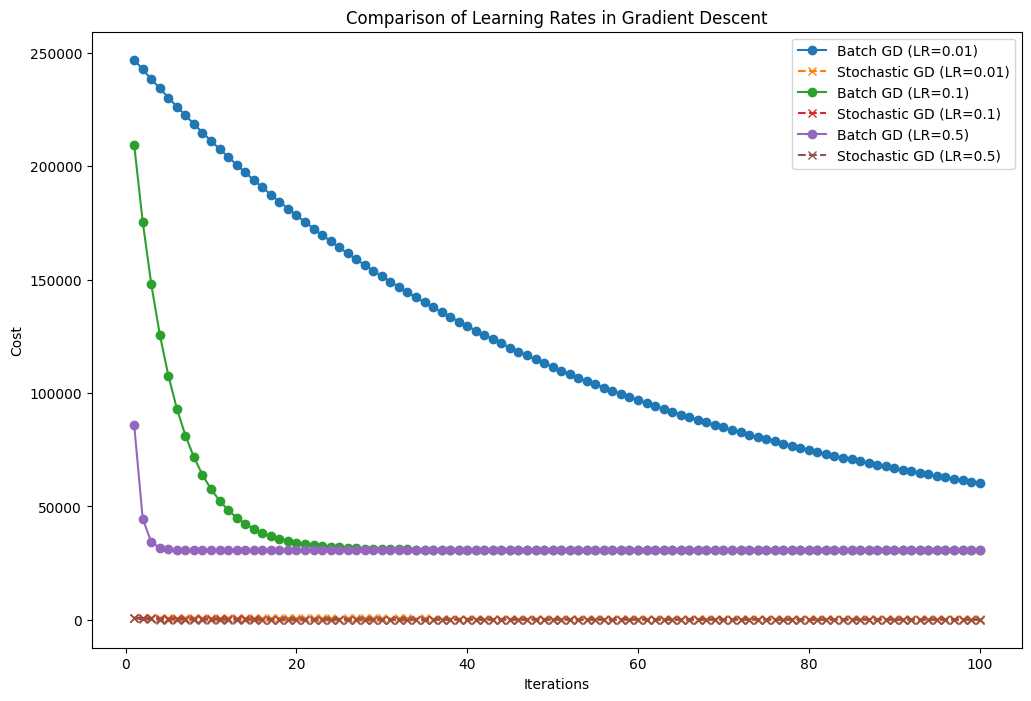

In [44]:
#3.

import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler


# Load the Boston Housing dataset from seaborn
boston = sns.load_dataset('tips')  # Substitute with the desired dataset

# Assuming 'total_bill' as the feature and 'tip' as the target for illustration
X = boston[['total_bill']].values
y = boston['tip'].values.reshape(-1, 1)
# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add a bias term to the features
X_bias = np.c_[np.ones((X.shape[0], 1)), X]

# Initialize random weights
np.random.seed(42)  # for reproducibility
y_pred_initial = np.random.randn(X_bias.shape[1], 1)

# Number of iterations
iterations = 100

# Learning rates to compare
learning_rates = [0.01, 0.1, 0.5]

# Plot settings
plt.figure(figsize=(12, 8))
plt.title('Comparison of Learning Rates in Gradient Descent')
plt.xlabel('Iterations')
plt.ylabel('Cost')

# Plot the results for each learning rate
for lr in learning_rates:
    # Batch Gradient Descent
    bgd_final_y_pred, bgd_cost_history, _ = gradient_descent(X_bias, y, y_pred_initial.copy(), learning_rate=lr, iterations=iterations)

    # Stochastic Gradient Descent
    sgd_final_y_pred, sgd_cost_history = stocashtic_gradient_descent(X_bias, y, y_pred_initial.copy(), learning_rate=lr, iterations=iterations)

    # Plot cost history for each method
    plt.plot(range(1, iterations + 1), bgd_cost_history, label=f'Batch GD (LR={lr})', linestyle='-', marker='o')
    plt.plot(range(1, iterations + 1), sgd_cost_history, label=f'Stochastic GD (LR={lr})', linestyle='--', marker='x')


# Show legend
plt.legend()
plt.show()
